# EDA
# Algerian Forest Fire 

By Abhishek Dave

Linkdin :- 



Life Cycle of ML Project
* Understanding the problem Statement
* Data Collection
* Data Cleaning
* EDA
* Data Pre-Processing
* Model Training 
* Choose best Model

# 1) Problem Statement 
* The dataset comprises of two region of Algeria Forest, namely the Bejaia region and Sidi-Bel-abbes region 
* By the input features we are going to predict that algerian forest will catch fire or not 
* This prediction will be used for Forest Fire Situation tackers and make correct preventions to avoid fire in future. 

# 2) Data Collection
* The Dataset is collected from website named UCI ML Repository
* the dataset consist of 15 columns and 244 rows.

# 2.1 Importing Data and various Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import warnings 

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# Loading CSV data as Pandas Dataframe

In [3]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)

In [4]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# 2.2 Data Cleaning

removing unneccessay rows from dataset

In [5]:
df.drop(index = [122,123], inplace = True)
df.reset_index(inplace = True)
df.drop('index', axis = 1, inplace = True)

In [6]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


Adding new feature in dataset named 'Region'

In [7]:
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

In [8]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes


In [9]:
# Stripping the name of the columns

df.columns = [i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [10]:
# Stripping the Classes features data

df.Classes = df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [11]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4   RH           244 non-null    object
 5   Ws           244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  region       244 non-null    object
dtypes: object(15)
memory usage: 28.7+ KB


We need to change the datatype of the dataset

In [13]:
df['day'] = df['day'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)
df['Temperature'] = df['Temperature'].astype(int)
df['RH'] = df['RH'].astype(int)
df['Ws'] = df['Ws'].astype(int)
df['Rain'] = df['Rain'].astype(float)
df['FFMC'] = df['FFMC'].astype(float)
df['DMC'] = df['DMC'].astype(float)
df['DC'] = df['DC'].astype(float)
df['ISI'] = df['ISI'].astype(float)
df['BUI'] = df['BUI'].astype(float)
df['FWI'] = df['FWI'].astype(float)

ValueError: could not convert string to float: '14.6 9'

In [14]:
# these two errors i was getting thus use this to fix the issue
df['DC'] = df['DC'].str.replace(" ", "")
df['FWI'] = df['FWI'].str.replace('fire', '0') # i am thinking to replace this value '0' by mode of this feature later. 

In [15]:
# df[df['FWI'] == 'fire'].index 
# isse index mil jaigi fir usko baad me mode se bhi replace ker sakte hai

In [16]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)
df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']] = df[['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(7), int32(6), object(2)
memory usage: 23.0+ KB


Thus we successfully converted the dataset in proper format.

combining day, month, year into one feature Date

In [18]:
df['date'] = pd.to_datetime(df[['day', 'month', 'year']])

In [19]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia,2012-06-04
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes,2012-09-27
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


In [20]:
df.drop(['day', 'month', 'year'], axis = 1,  inplace = True)

In [21]:
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,Sidi-Bel Abbes,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


# 4) Exploring Data

# 4.1 Profiling of the data

In [22]:
# Shape of dataset
df.shape

(244, 13)

Observation:
    13 columns and 244 rows 

In [23]:
# columns of the dataset
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

In [24]:
# Missing values in dataset
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

Observation:
    we got i null value in Classes region

In [25]:
# Unique values in classes
df['Classes'].unique()
# we will fill this nan by mode value (for that you need numeric data so lets encode it)

array(['not fire', 'fire', nan], dtype=object)

In [26]:
## Handling Categorical Feature Classes

df['Classes']=df['Classes'].map({'not fire':0,'fire':1})
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


In [27]:
df['Classes'].dtype

dtype('float64')

In [28]:
# Focus on Replacing Null Value
# The best Way of Replacing Null Value by using mode

df['Classes'].mode()[0]

1.0

In [29]:
df['Classes'] = df['Classes'].fillna(df['Classes'].mode()[0])

In [30]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

Now we dont have any null value in our dataset

In [31]:
df['Classes'].unique()

array([0., 1.])

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(3), object(1)
memory usage: 22.0+ KB


Observations:
* 244 R X 13 C
* No Null values
* dtypes
* memory usage
* (check df.info() output)

In [33]:
## Checking the usage of the memory by the dataset
df.memory_usage()

Index           128
Temperature     976
RH              976
Ws              976
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

<AxesSubplot:xlabel='Classes', ylabel='count'>

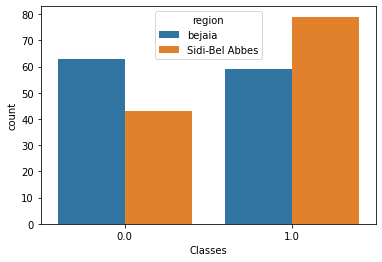

In [34]:
sns.countplot(data = df, x ='Classes', hue ='region' )

Obserration:
    Sidi-Bel-Abbes region has more occurences of fire(1)

# 4.1.1 Numerical and Catogorical columns

Numeric Dataset

In [35]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('We have {} numerical features viz {}'.format(len(numerical_features),numerical_features))


We have 12 numerical features viz ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'date']


Catagorical Dataset

In [36]:
catagorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('We have {} catagorical features viz {}'.format(len(catagorical_features),catagorical_features))


We have 1 catagorical features viz ['region']


# 4.1.2 Feature Information

In [37]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02


In [38]:
min(df['FFMC'])

28.6

Weather data observations:-
* Temperature : temperature noon (temperature max) in Celsius degrees: 22 to 42
* RH : Relative Humidity in %: 21 to 90
* Ws :Wind speed in km/h: 6 to 29
* Rain: total day in mm: 0 to 16.8

FWI Components

* (FFMC) Fine Fuel Moisture Code index from the FWI system: 28.6 to 92.5
* (DMC) Duff Moisture Code index from the FWI system: 1.1 to 65.9
* (DC) Drought Code index from the FWI system: 7 to 220.4
* (ISI) Initial Spread Index from the FWI system: 0 to 18.5
* (BUI) Buildup Index from the FWI system: 1.1 to 68
* (FWI) Fire Weather Index: 0 to 31.1
* Classes: two classes, namely Fire and not Fire.
* Region: Two Regions, namely Bejaia Region indicated with 0 and Sidi Bel-Abbes Region indicated with 1.

DATE Observations (DD/MM/YYYY) :-

* Date :- Date Displayed in (DD/MM/YYYY) format in dataset


# Univariate Analysis
The term univariate analysis refers to the analysis of one variable.
uni means one.
the purpose of univariate analysis is to understand the distributioin of values for a single variable.

In [39]:
df['Temperature']

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [41]:
df.var()

Temperature      13.204817
RH              221.539415
Ws                7.897102
Rain              3.997623
FFMC            205.565939
DMC             152.968382
DC             2267.606583
ISI              17.433281
BUI             201.777024
FWI              55.337076
Classes           0.246711
dtype: float64

# Numerical feature analysis

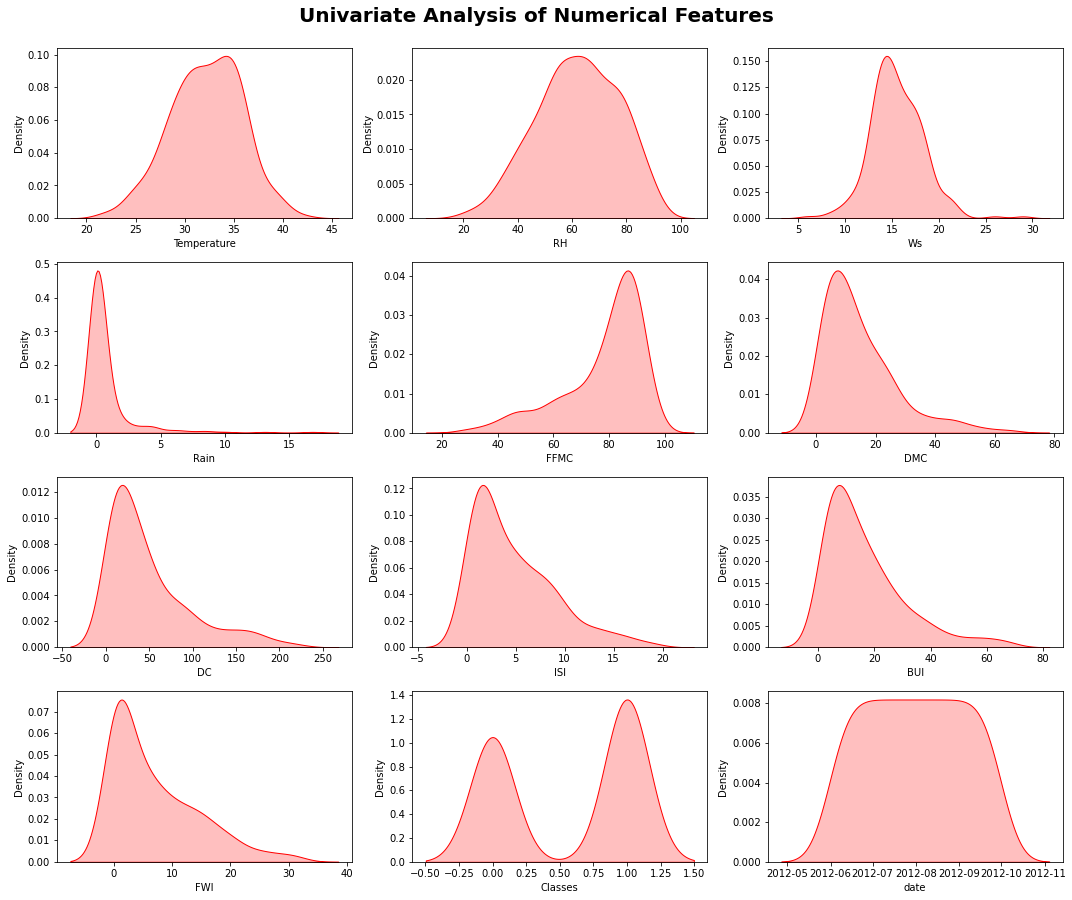

In [43]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=1, y=1) # Alpha controls the boldness and y provides the spacing of title with the graph

for i in range(0, len(numerical_features)):
    
    plt.subplot(5, 3, i+1) # 1 line me 4 graphs aayenge 
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()


Observation:
    Rain, ISI, BUI, DMC are right skewed and positively skewed.
    FFMC is left skewed and negatively skewed.
    outliers in Rain, BUI, DMC and FFMC
    

In [45]:
# Scatter plot to see trends in each numerical column

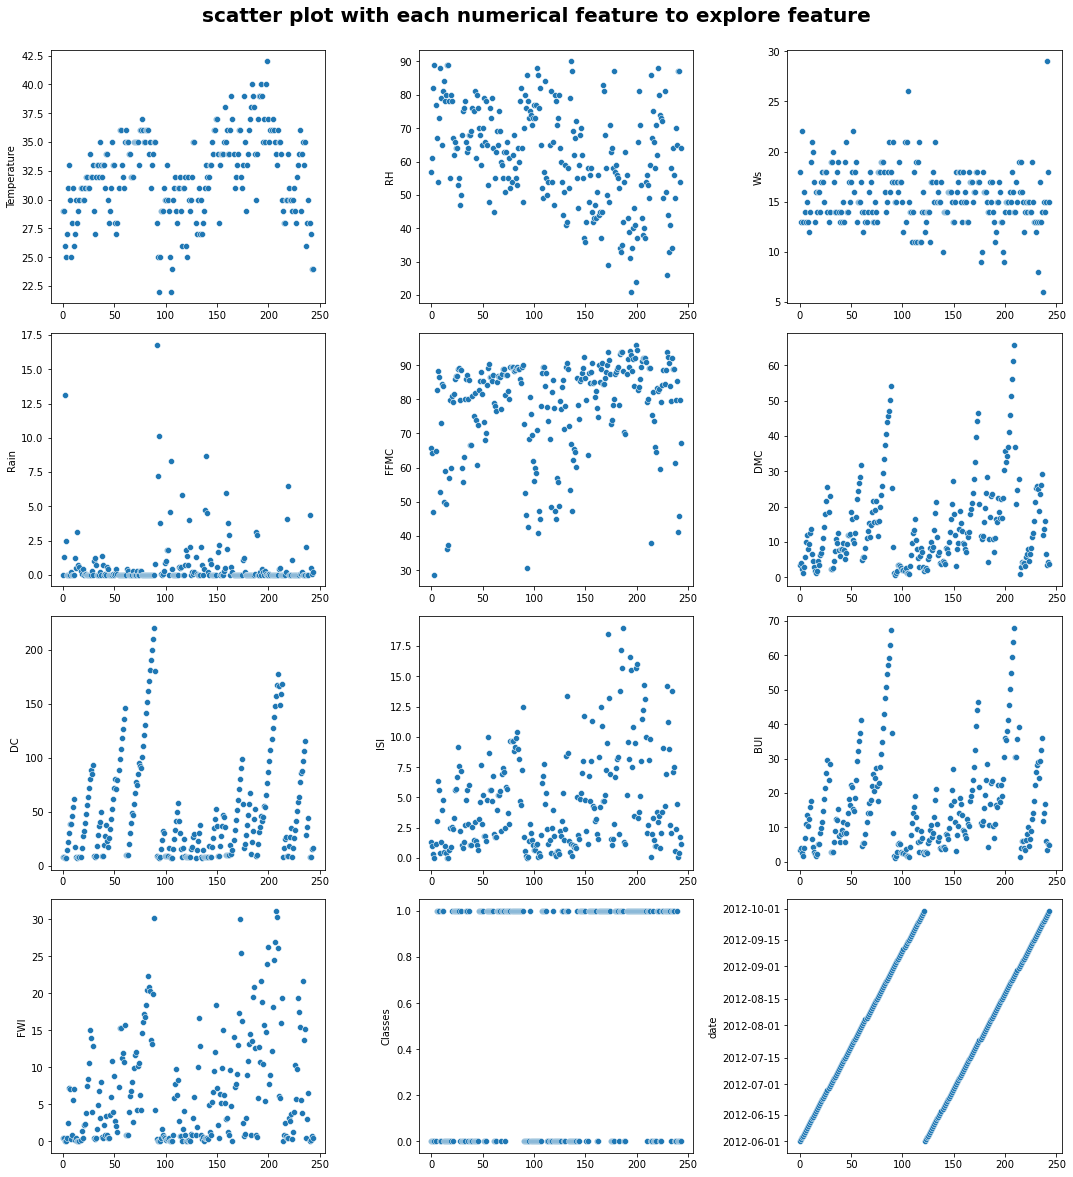

In [53]:
plt.figure(figsize= (15,20))
plt.suptitle('scatter plot with each numerical feature to explore feature', fontsize = 20, fontweight = 'bold', alpha = 1, y=1)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=numerical_features[i], x = df.index, data = df)
    plt.tight_layout()

In [ ]:
Observation:
    Extreme value of the temperation is above 40
    WS is mostly between 10 and 20

In [56]:
catagorical_features

['region']

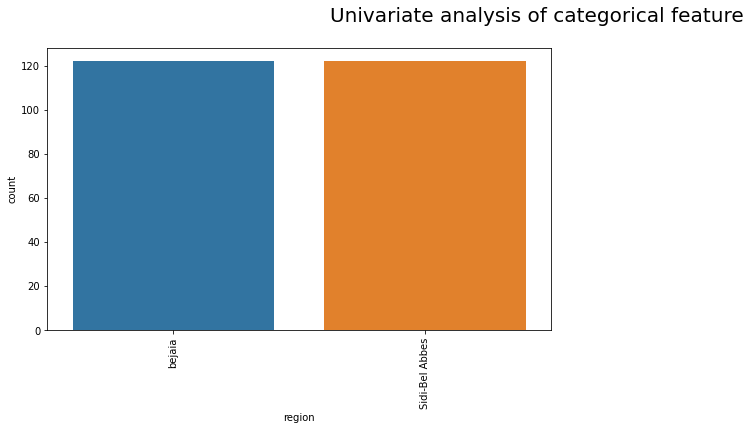

In [55]:
# categorical columns analysis 
plt.figure(figsize = (15,10))
plt.suptitle('Univariate analysis of categorical feature', fontsize = 20, alpha = 1, y = 1)

for i in range(0,len(catagorical_features)):
    plt.subplot(2,2, i+1)
    sns.countplot(x = df[catagorical_features[i]])
    plt.xlabel(catagorical_features[i])
    plt.xticks(rotation = 90)
    plt.tight_layout()


In [ ]:
# Bivariate analysis and multivariate analysis
# stripplot (catagorical vs numerical)
# scatterplot/pairplot(numerical vs numerical) (it will check correlation)
#boxplot (outliers)
# heatmap ( correlation)
# lineplot (trend in numerical feature with time)

In [58]:
# Multicolinearlity in numerical feature

In [60]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370511,0.607551,0.455504,0.558393,0.518119
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220344,-0.690637,-0.348587,-0.569997,-0.435023
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076253,0.015248,0.029756,0.028799,-0.066529
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296808,-0.347105,-0.299171,-0.322682,-0.379449
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503919,0.739730,0.589652,0.686033,0.770114
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875362,0.674499,0.982073,0.874778,0.584188
DC,0.370511,-0.220344,0.076253,-0.296808,0.503919,0.875362,1.000000,0.498926,0.941906,0.740186,0.507132
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498926,1.000000,0.635891,0.907461,0.735511
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941906,0.635891,1.000000,0.857771,0.583882
FWI,0.558393,-0.569997,0.028799,-0.322682,0.686033,0.874778,0.740186,0.907461,0.857771,1.000000,0.713357


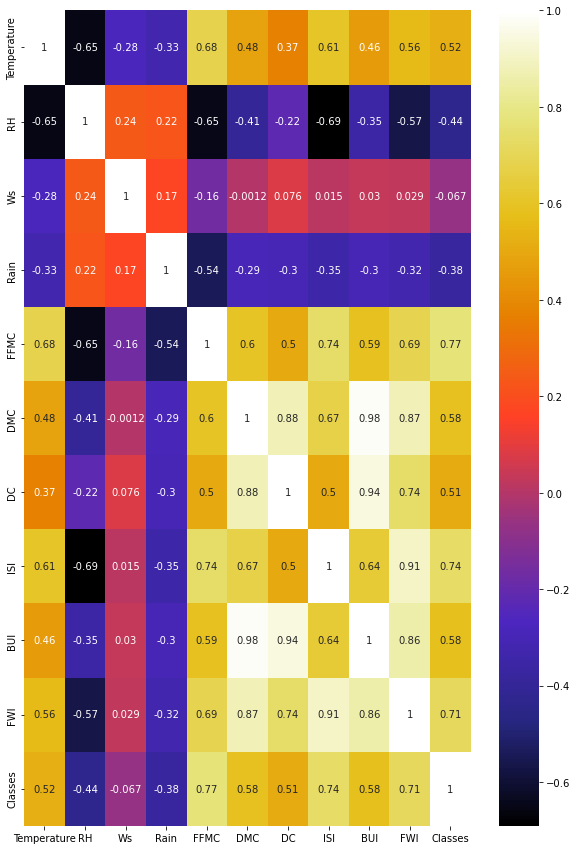

In [67]:
#heatmap
plt.figure(figsize = (10,15))
sns.heatmap(df.corr(), annot = True, cmap = 'CMRmap')
plt.show()

In [ ]:
highly positive correlated features are DMC and BUI
highly negative correlated features are ISI and RH, FFMC and RH, RH and Temp

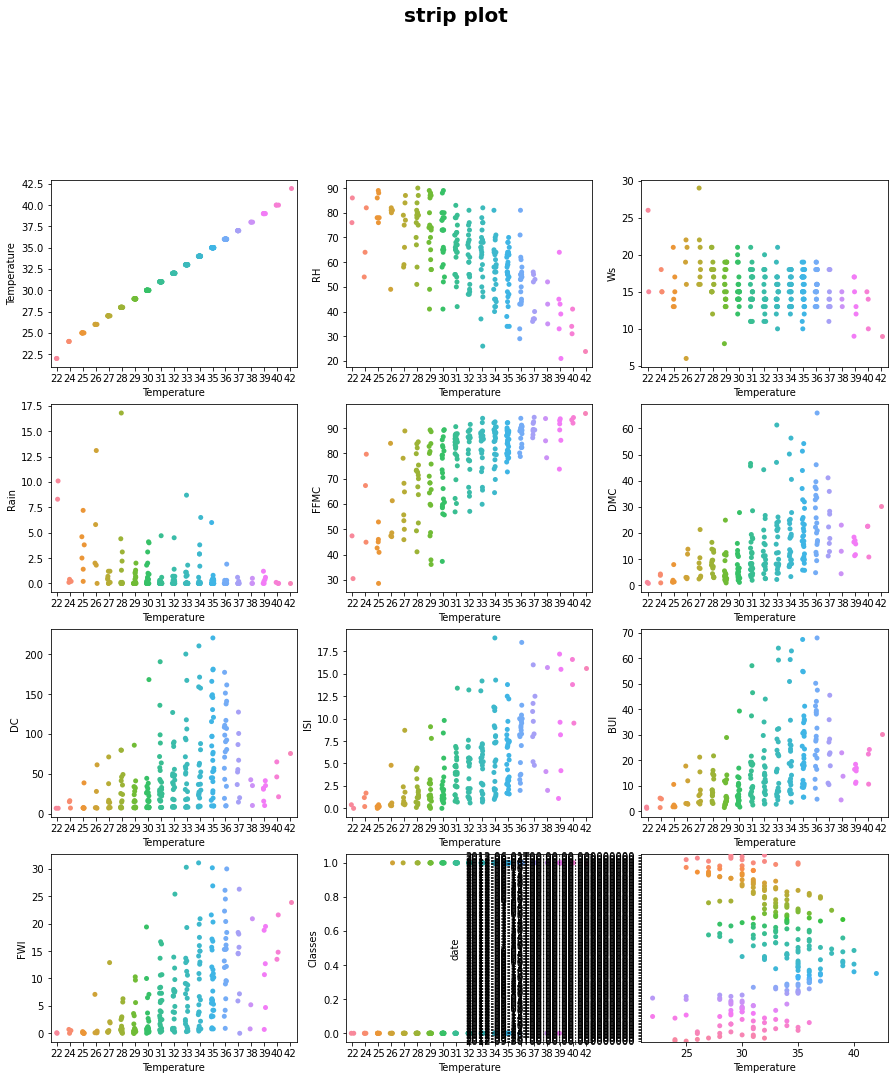

In [72]:
# strip plot to the see the relationship btween numerical feature and target
# here target feature is temperature 

plt.figure(figsize = (15,20))
plt.suptitle("strip plot", fontsize = 20, fontweight = 'bold', alpha = 1, y = 1)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=numerical_features[i], x = 'Temperature', data = df)
    plt.tight_layout

Observation:
    high RH and Low Temperature
    FFMC increasing then Temperature increasing
    low ws high temp
    
    
    

<AxesSubplot:>

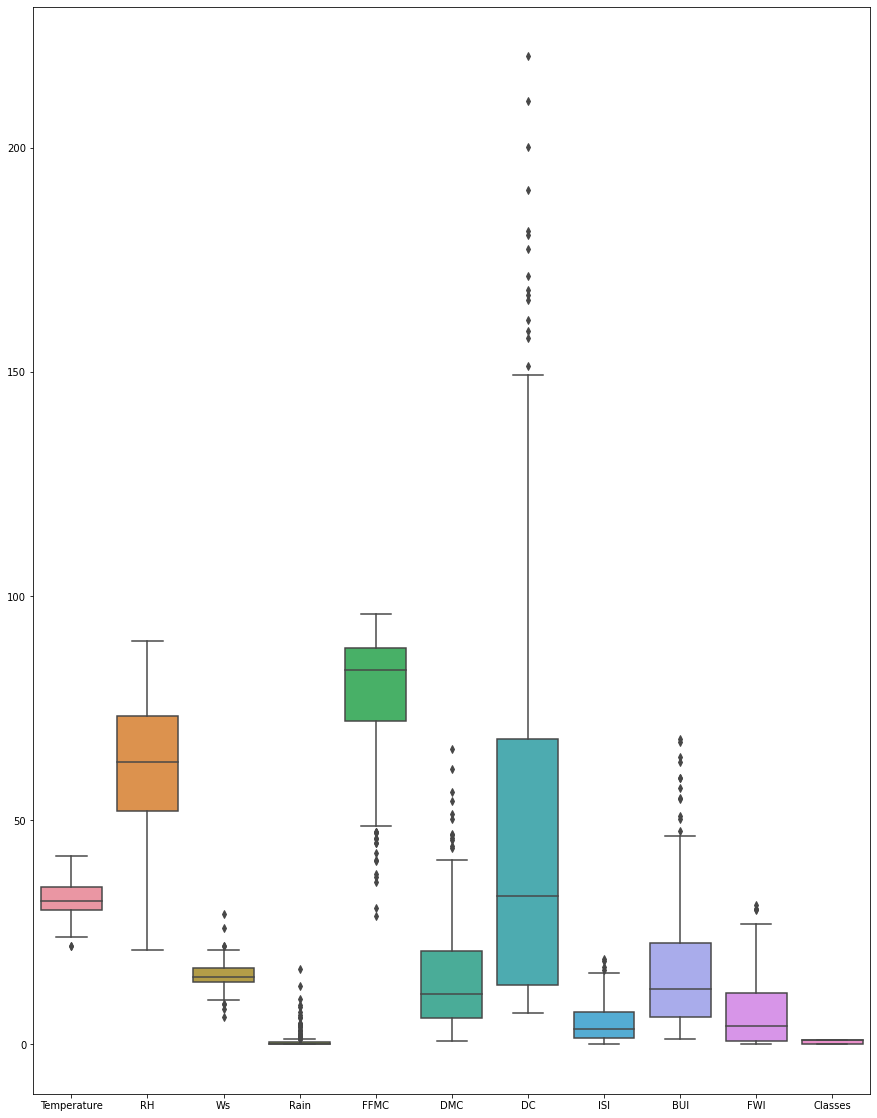

In [76]:
# Box plot to find outliers
plt.figure(figsize = (15,20))
sns.boxplot(data = df, orient = 'v')

Observation:
    DC, WS, Rain, FFMC, DMC, BUI has many outliers

# statistical analysis 

In [77]:
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288484,4.774180,16.664754,7.006557,0.565574
std,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619393,4.175318,14.204824,7.438889,0.496700
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,1.000000
75%,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


# Graphicla Analysis

In [78]:
# which area has most of the times high temperature

<AxesSubplot:xlabel='region', ylabel='Temperature'>

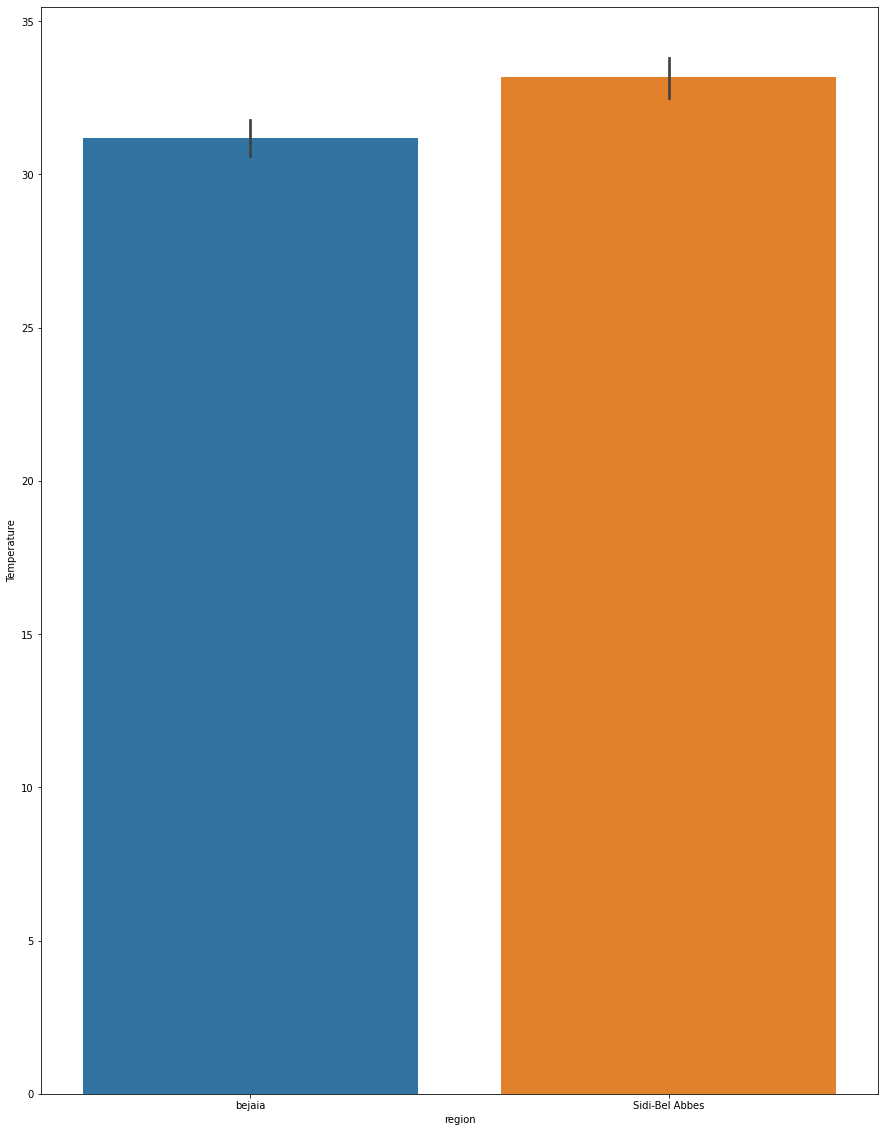

In [80]:
plt.figure(figsize = (15,20))
sns.barplot(x= 'region', y = 'Temperature', data = df)

In [81]:
# most of the times sidi-bel-abbes region has high temperature

# Temperature range which is in most of the places?

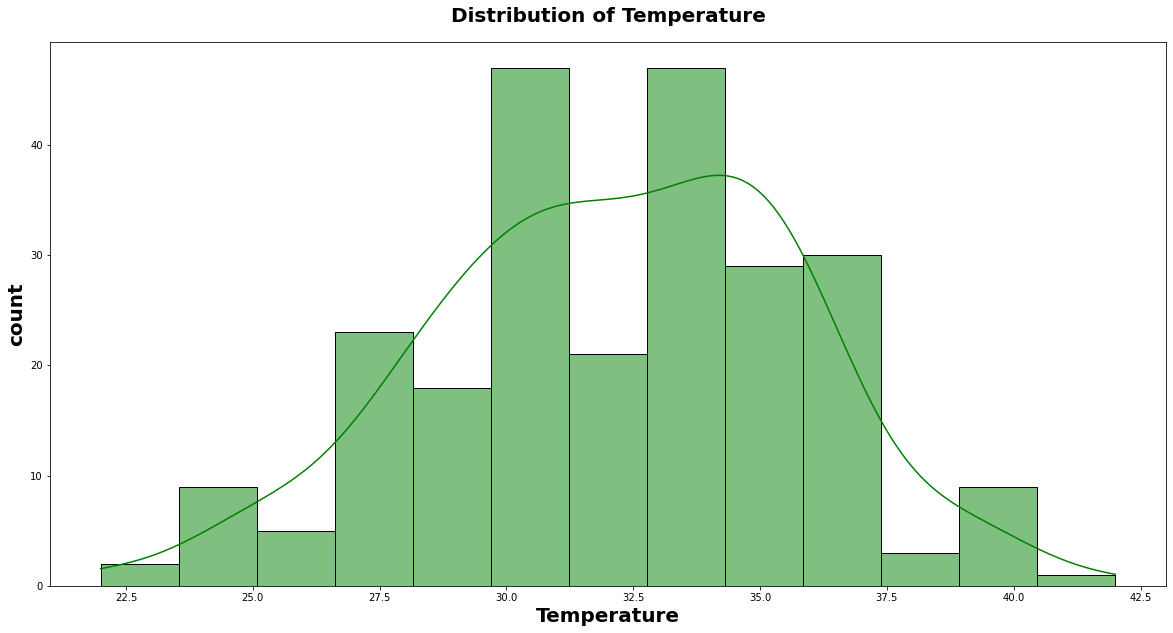

In [83]:
plt.subplots(figsize = (20,10))
sns.histplot(x = df.Temperature, color = 'g', kde = True)
plt.title('Distribution of Temperature', weight = 'bold', fontsize = 20, pad = 20 )
plt.xlabel('Temperature', weight = 'bold', fontsize = 20)
plt.ylabel("count", weight = 'bold', fontsize = 20)
plt.show()

In [84]:
# temperature occure most of the time in range 32.5 to 35.0

In [85]:
# what are most time rain happended wrt temperature

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

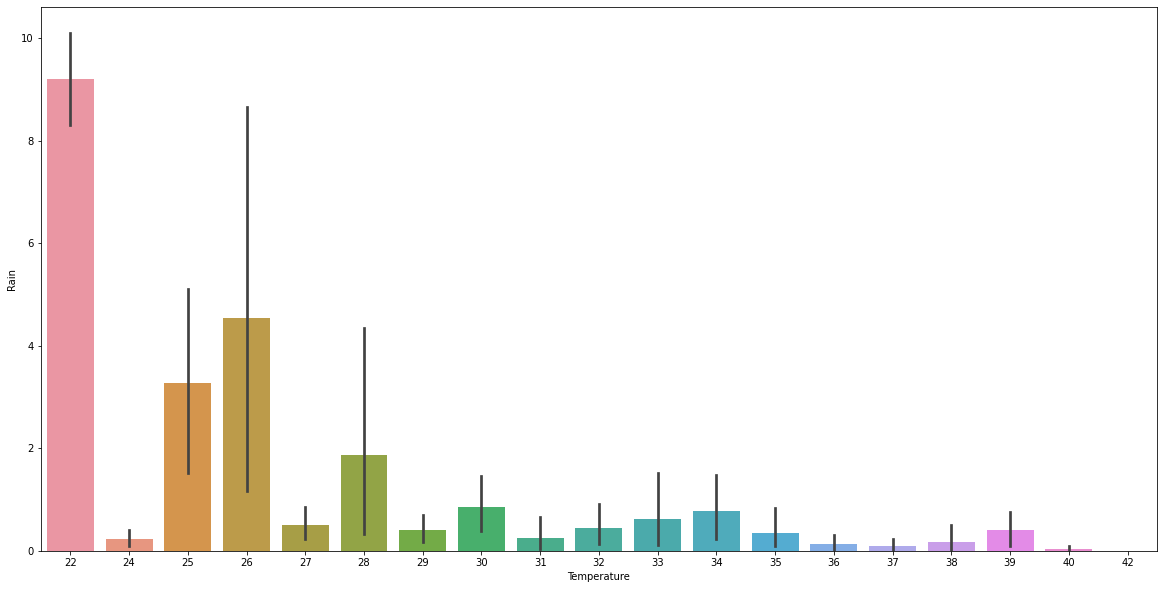

In [87]:
plt.subplots(figsize = (20,10))
sns.barplot(x = 'Temperature', y = 'Rain', data = df)

In [88]:
# rain is inversly prop to temp 

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

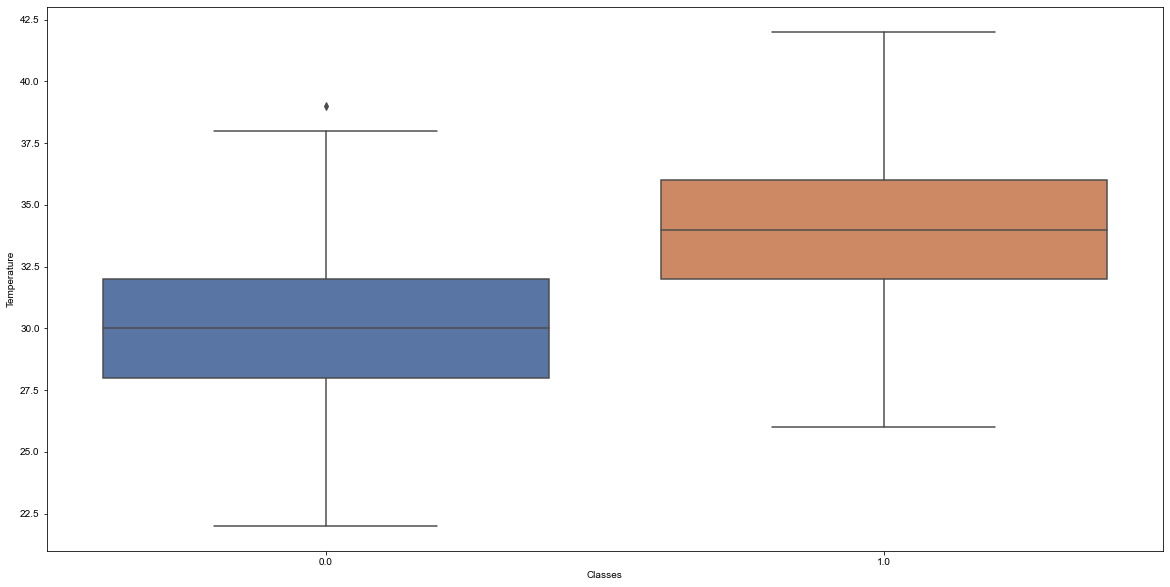

In [91]:
# Boxplot of class vs temperature 
plt.subplots(figsize = (20,10))
sns.set(style="whitegrid")
sns.boxplot(x= 'Classes', y = 'Temperature', data = df)

In [92]:
#boxplot of temp vs rain

<AxesSubplot:xlabel='Temperature', ylabel='Rain'>

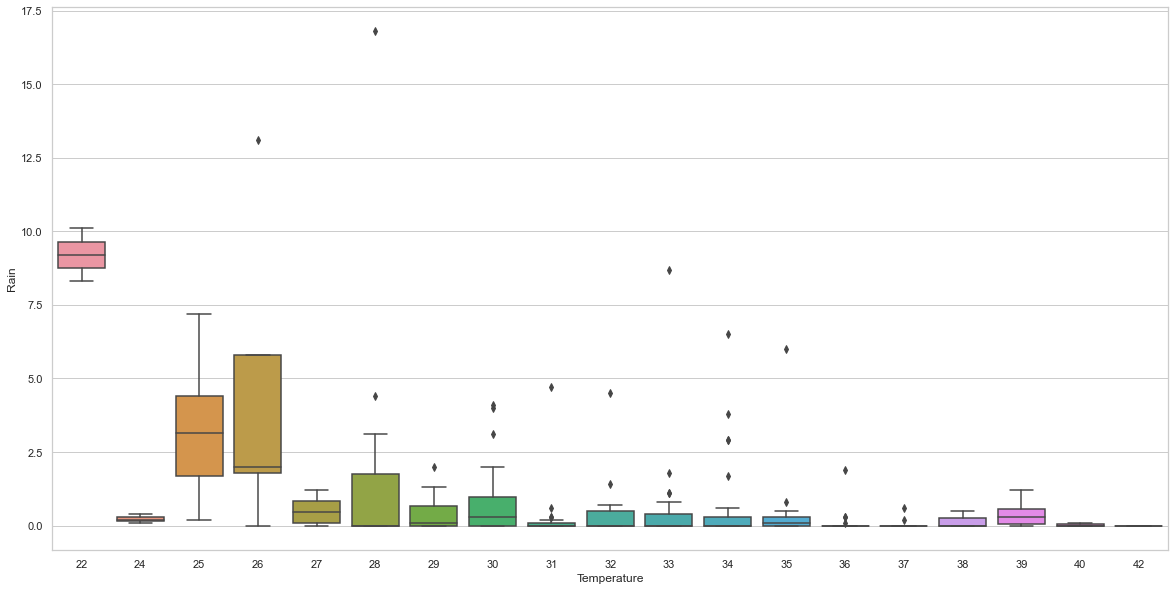

In [95]:
plt.subplots(figsize = (20,10))
sns.set(style="whitegrid")
sns.boxplot(x ='Temperature', y ='Rain', data = df)

# Observation: rain is high when temp is low

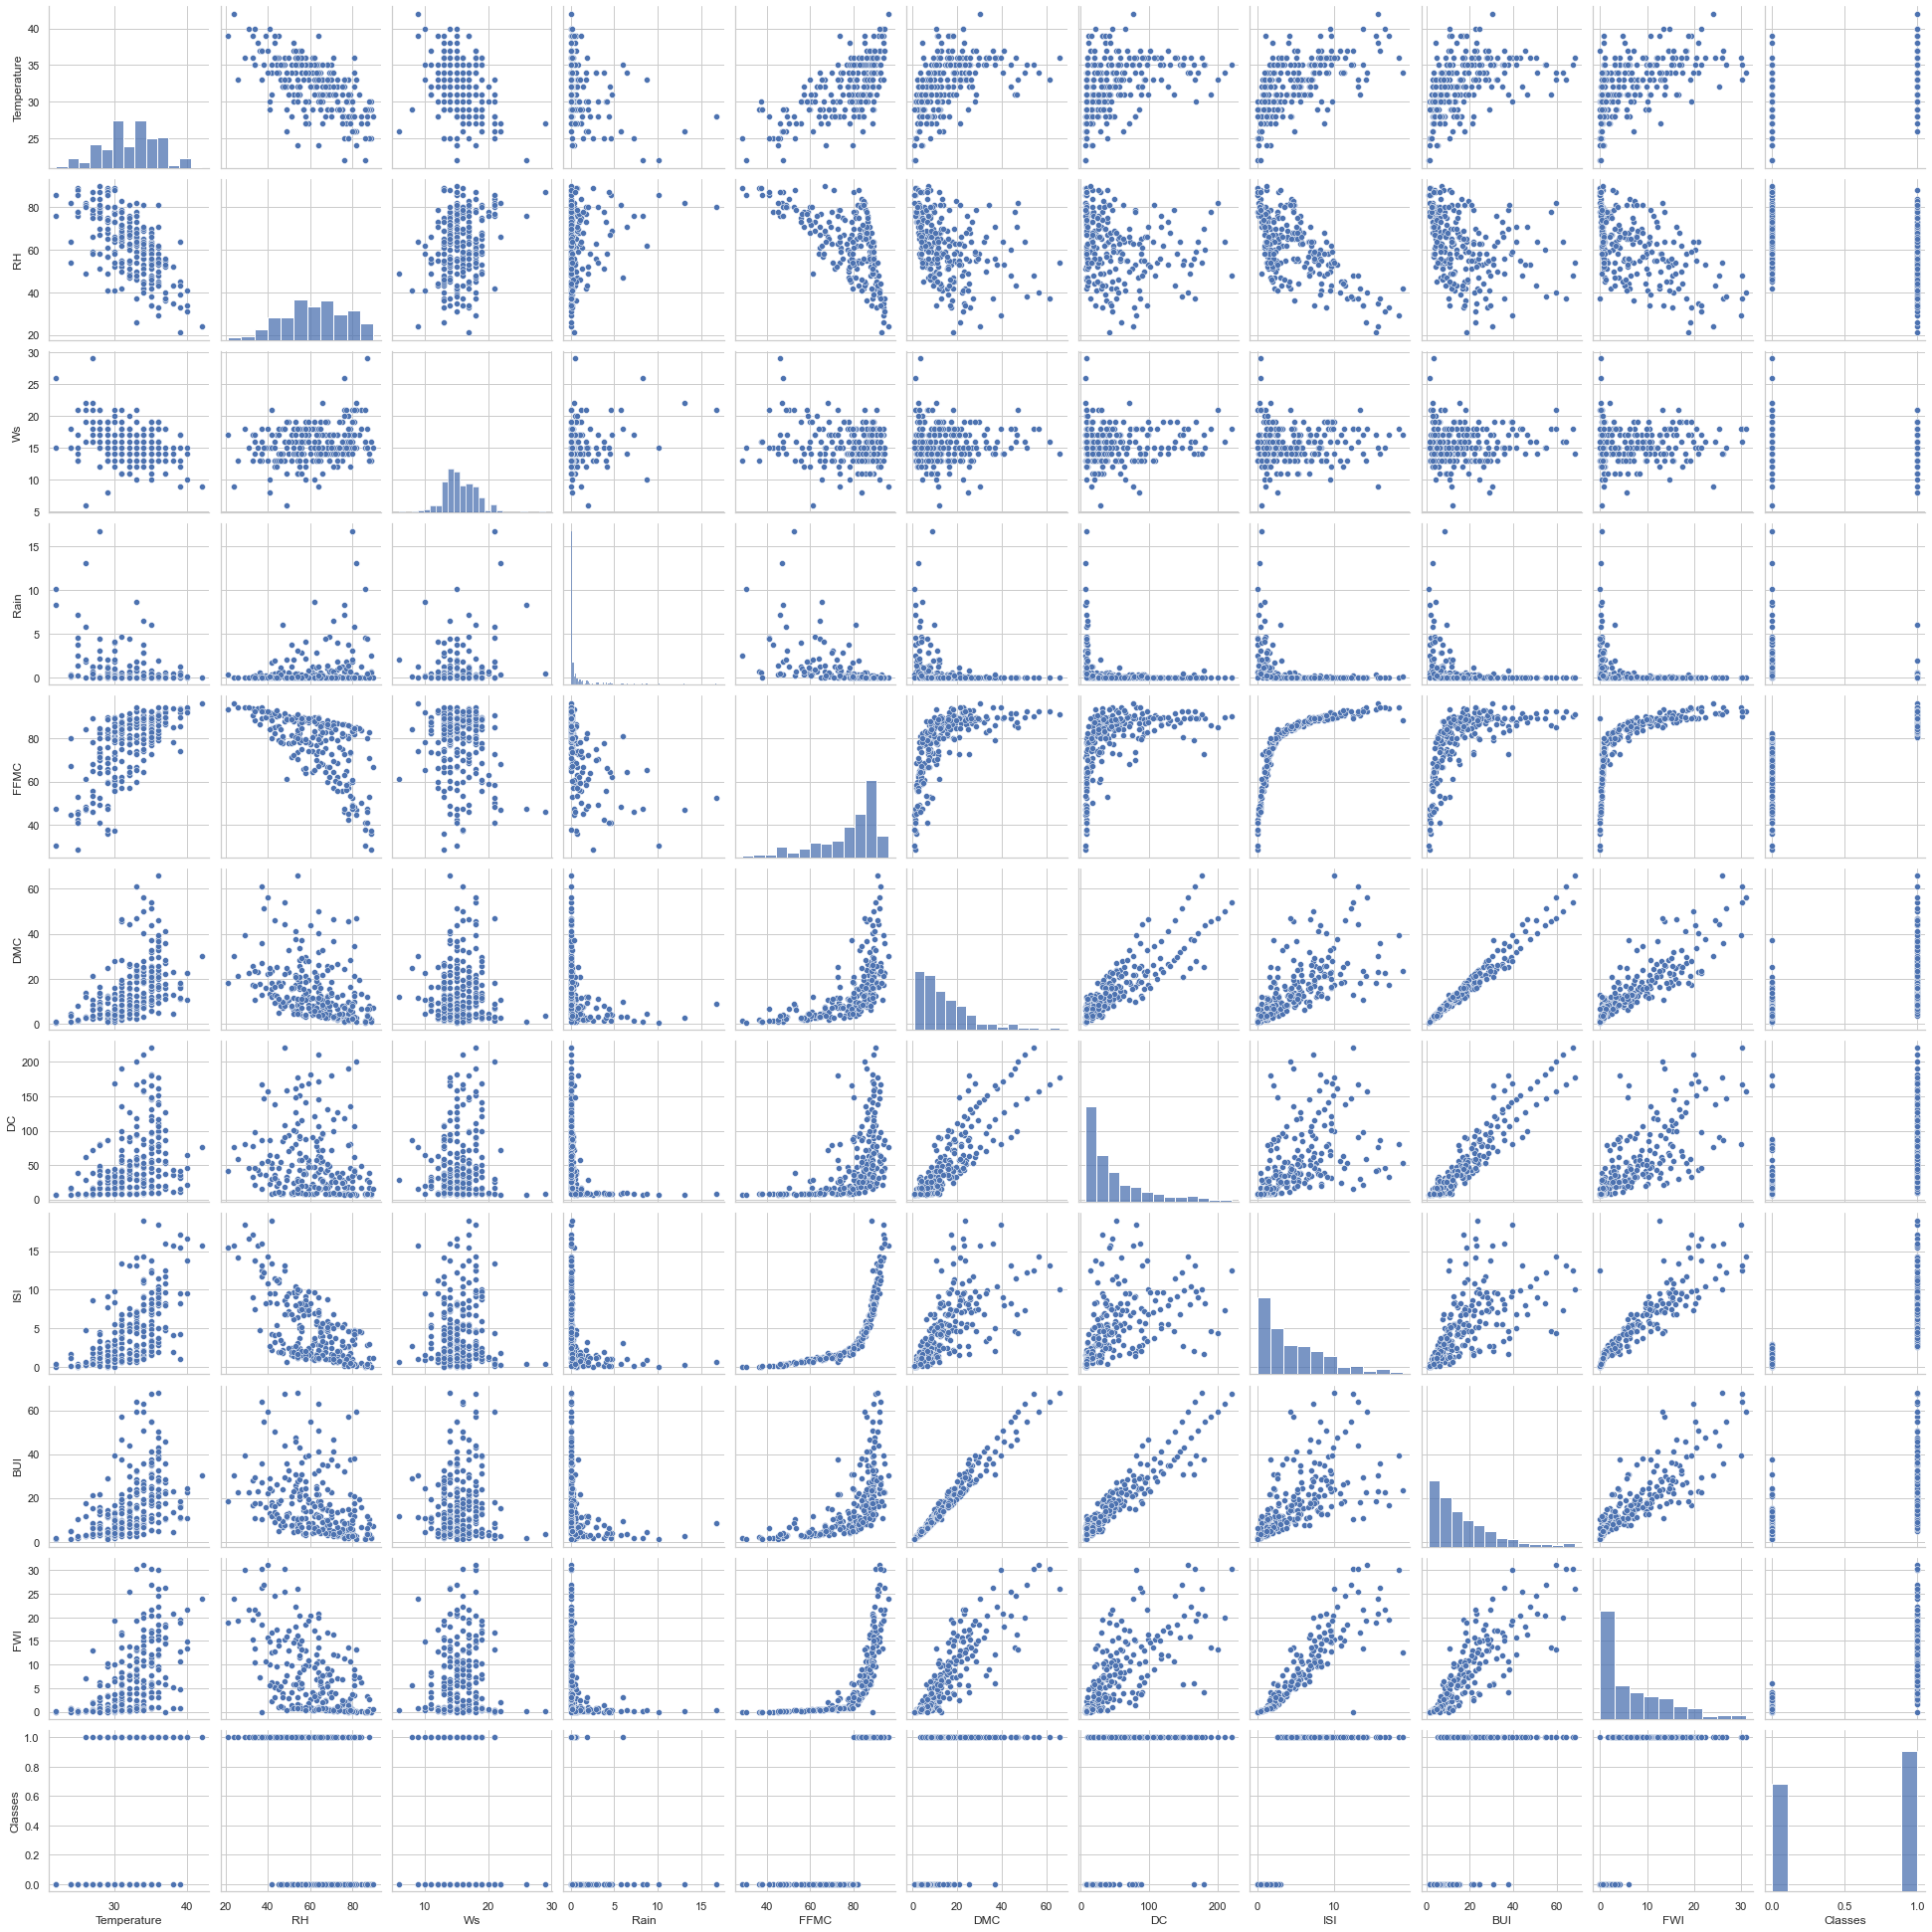

In [96]:
sns.pairplot(df)

<AxesSubplot:>

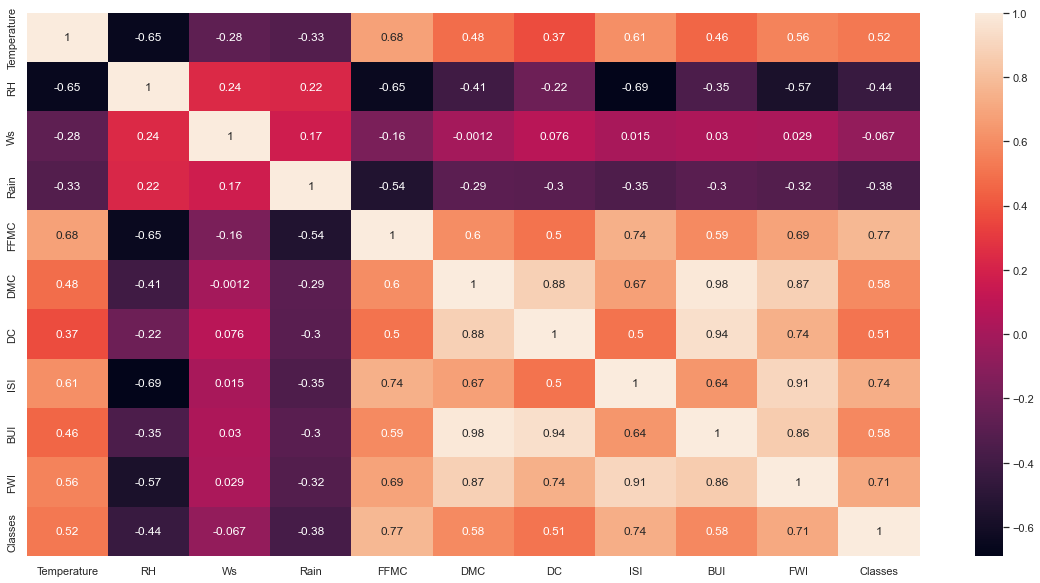

In [98]:
plt.subplots(figsize = (20,10))
sns.heatmap(df.corr(), annot = True)

Text(0, 0.5, 'Temperature')

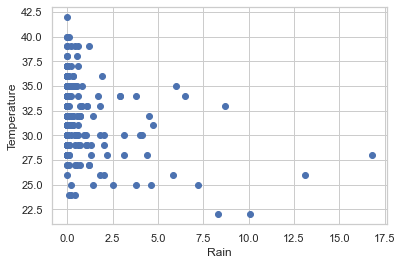

In [99]:
plt.scatter(df['Rain'], df['Temperature'])
plt.xlabel('Rain')
plt.ylabel('Temperature')

Observation:
    when rain is low, temp is high and viceversa

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

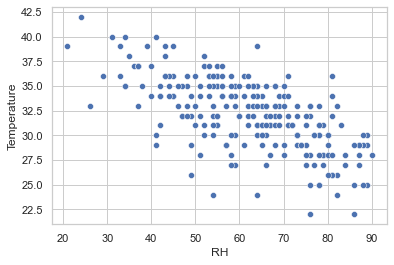

In [101]:
#plt.subplots(figsize = (20,10))
sns.scatterplot(df['RH'], df['Temperature'])

observation:
    with increase in RH temp is decreasing 

<AxesSubplot:xlabel='RH', ylabel='Temperature'>

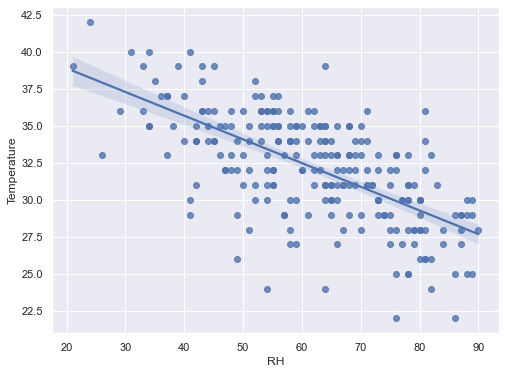

In [104]:
sns.set(rc={'figure.figsize':(8,6)})
sns.regplot(x = df['RH'], y = df['Temperature'])

<AxesSubplot:xlabel='FFMC', ylabel='Temperature'>

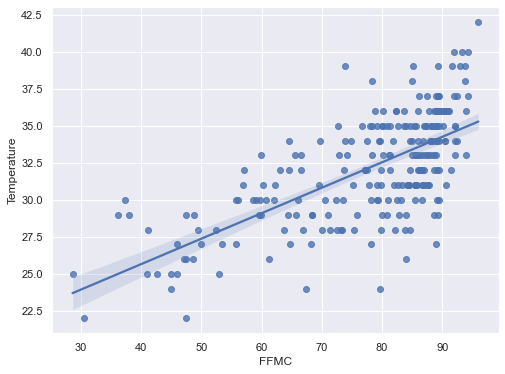

In [106]:
sns.regplot(x = df['FFMC'], y = df['Temperature'])

<AxesSubplot:xlabel='Temperature'>

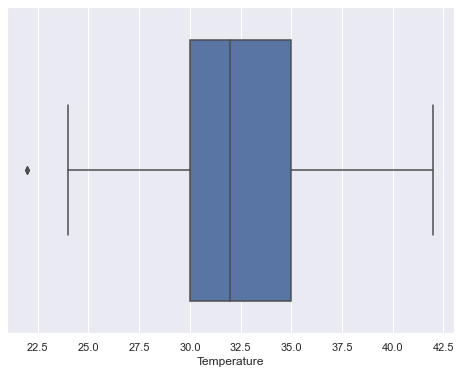

In [107]:
sns.boxplot(df['Temperature'])

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    int32         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int32(3), object(1)
memory usage: 22.0+ KB


In [109]:
#Dependent and Independent Features

In [117]:
x = df.iloc[:,1:-2] # all indipendent features
y = df.iloc[:,0] # dependent feture viz Temperature

In [118]:
y

0      29
1      29
2      26
3      25
4      27
       ..
239    30
240    28
241    27
242    24
243    24
Name: Temperature, Length: 244, dtype: int32

In [119]:
x

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...
239,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1.0
240,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0.0
241,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0.0
242,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0.0


In [120]:
# we are dropping the categorical columns only taking the numerical columns

In [132]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.33, random_state = 42)

In [137]:
#standerize or feature scaling datasets.


In [138]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [139]:
scaler

StandardScaler()

In [140]:
x_train = scaler.fit_transform(x_train)

In [141]:
x_test = scaler.transform(x_test)

In [142]:
x_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.47763563,
        -0.8196431 , -1.04390785],
       [ 0.14460201, -0.93856657, -0.39436188, ..., -0.3471914 ,
        -0.08219052,  0.95793896],
       [-1.41768313,  2.04653297, -0.39436188, ...,  0.09906517,
         1.36540157,  0.95793896],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.01314351,
        -0.90158227, -1.04390785],
       [-0.39880152,  0.18084575, -0.39436188, ..., -0.058841  ,
         0.31384882,  0.95793896],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.9719506 ,
        -0.87426921, -1.04390785]])

In [143]:
x_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01,
         9.57938964e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02,
         9.57938964e-01],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02,
         9.57938964e-01],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01,
         9.57938964e-01],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  6.32831985e-01,  3.27554990e-01,
         1.19490243e+00,  5.24725278e-01,  1.10592751e+00,
         9.

In [144]:
# Model Training 

In [145]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [146]:
regression.fit(x_train,y_train)

LinearRegression()

In [147]:
#print coefficent and intercepts

In [148]:
regression.coef_

array([-1.04986953, -0.48129664,  0.11958695,  1.82454037,  0.93457062,
        0.67775812,  0.17240097, -1.24784751,  0.05578247, -0.23947047])

In [149]:
regression.intercept_

31.98159509202454

In [150]:
# prediction for test data

In [151]:
reg_pred = regression.predict(x_test)

In [152]:
reg_pred

array([33.03978833, 34.17769653, 33.94588029, 33.13844656, 36.5823973 ,
       32.55207092, 35.22028015, 27.32875415, 30.96717669, 29.59963804,
       29.35927214, 33.37763009, 33.95965738, 33.37643952, 34.2101388 ,
       32.17095255, 37.06511639, 25.21081696, 32.2877469 , 33.54887709,
       30.91186395, 28.43690229, 35.05747331, 28.67446837, 36.46762887,
       26.81562299, 32.74021305, 33.29499104, 32.84431169, 34.67051366,
       34.53538946, 31.60149908, 32.66464561, 33.31455499, 32.69402151,
       33.28829995, 30.39955028, 34.24376438, 31.84282583, 23.74290402,
       33.60298812, 33.7820521 , 32.43169584, 24.82611593, 36.16650353,
       32.44858485, 31.1507195 , 30.43686049, 35.31099781, 34.62438763,
       36.92713596, 30.95584431, 30.88627498, 34.35162759, 33.86089998,
       32.12608726, 36.87861502, 32.33412026, 30.12593045, 36.49159511,
       33.14198313, 29.99642097, 33.99025835, 32.04634421, 31.81089492,
       24.80253391, 33.17062891, 30.59365236, 36.7332315 , 34.83

In [153]:
# Assumption of Linear Regression

Text(0, 0.5, 'Predicted Value')

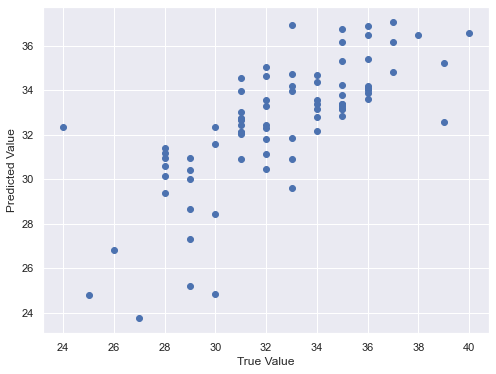

In [154]:
plt.scatter(y_test, reg_pred)
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

In [157]:
# Residuals
residuals = y_test - reg_pred

In [158]:
residuals

24    -2.039788
6     -1.177697
153   -0.945880
211    1.861553
198    3.417603
         ...   
180    0.459133
5     -1.117988
56     0.580463
125   -2.345953
148    1.898086
Name: Temperature, Length: 81, dtype: float64

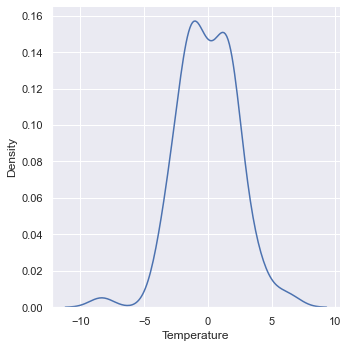

In [160]:
sns.displot(residuals, kind = 'kde')

In [161]:
# graph is little left skewed 

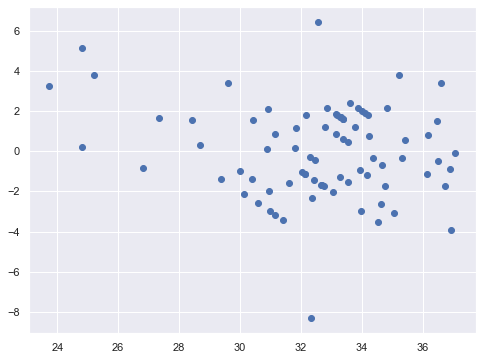

In [162]:
# scatter plot with predictions and residuals 
# it should be uniform distribution 
plt.scatter(reg_pred, residuals)

In [163]:
# Performance Matrixes

In [164]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [165]:
mean_absolute_error(y_test, reg_pred)

1.8257407611032388

In [166]:
mean_squared_error(y_test, reg_pred)

5.192456092089772

In [167]:
np.sqrt(mean_squared_error(y_test, reg_pred))

2.278696138604218

In [169]:
# R2 and adjusted R2
score = r2_score(y_test, reg_pred)

In [170]:
#adjusted R2
1 - (1-score)* (len(y_test)-1)/(len(y_test) - x_test.shape[1]-1)

0.4475022089204972

# Ridge Regresssion 

In [171]:
from sklearn.linear_model import Ridge
ridge = Ridge()


In [172]:
ridge.fit(x_train, y_train)

Ridge()

In [173]:
ridge.coef_

array([-1.06328063, -0.48315341,  0.10250436,  1.76886014,  0.46035832,
        0.42838257,  0.21881839, -0.49193241, -0.01847088, -0.22960873])

In [174]:
ridge.intercept_

31.98159509202454

In [175]:
# Prediction

In [176]:
rid_pred = ridge.predict(x_test)

In [177]:
rid_pred

array([33.04328018, 34.15139659, 33.91608432, 33.12627132, 36.55192865,
       32.58445663, 35.19369854, 27.37065824, 30.98636644, 29.60928561,
       29.35129843, 33.42620287, 33.92480569, 33.38482028, 34.2574653 ,
       32.139879  , 36.98280164, 25.29870987, 32.25080355, 33.5172866 ,
       30.87580111, 28.43725481, 35.04329419, 28.69404952, 36.47126341,
       26.85665385, 32.74325591, 33.31130351, 32.84007474, 34.6105932 ,
       34.5337548 , 31.58337398, 32.65050356, 33.36431585, 32.67604242,
       33.29769412, 30.3457105 , 34.26203339, 31.7924185 , 23.78157669,
       33.62351662, 33.77262844, 32.4425385 , 24.8984504 , 36.10258201,
       32.4205334 , 31.12656093, 30.4651052 , 35.28426335, 34.60813223,
       36.8789102 , 30.92738078, 30.88670721, 34.42066156, 33.84612609,
       32.2495659 , 36.87234321, 32.3157568 , 30.12683752, 36.48350662,
       33.09544977, 29.99603603, 33.93101411, 32.01593543, 31.82580861,
       24.83538088, 33.16397525, 30.57598147, 36.71046921, 34.89

In [178]:
#Assumptions

Text(0, 0.5, 'Pridicted Value')

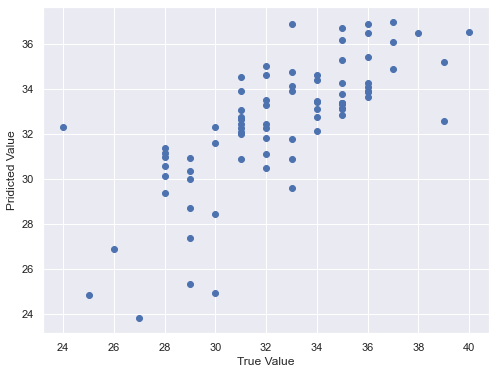

In [179]:
plt.scatter(y_test, rid_pred)
plt.xlabel('True Value')
plt.ylabel('Pridicted Value')

In [180]:
# Residuals

In [181]:
residuals = y_test - rid_pred

In [182]:
residuals

24    -2.043280
6     -1.151397
153   -0.916084
211    1.873729
198    3.448071
         ...   
180    0.515718
5     -1.104420
56     0.560847
125   -2.316926
148    1.923832
Name: Temperature, Length: 81, dtype: float64

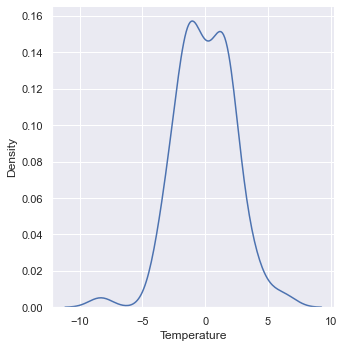

In [184]:
sns.displot(residuals, kind = 'kde')

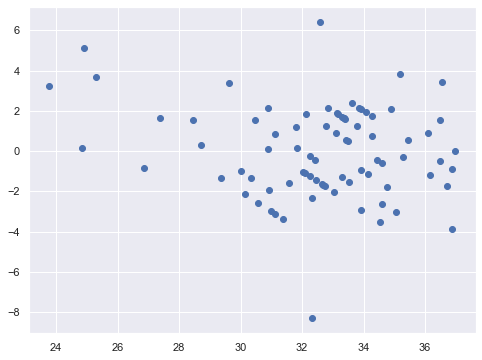

In [185]:
plt.scatter(rid_pred, residuals)

In [186]:
# Performance Matrix

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [188]:
mean_absolute_error(y_test, rid_pred)

1.818728039311163

In [189]:
mean_squared_error(y_test,rid_pred)

5.148969691128175

In [190]:
np.sqrt(mean_squared_error(y_test, rid_pred))

2.2691341280603434

In [191]:
# R2 

In [192]:
r2_score(y_test, rid_pred)

0.5206131666880665

In [193]:
r2 = r2_score(y_test, rid_pred)

In [194]:
N = len(y_test)

In [196]:
P = x_test.shape[1]

In [203]:
adjusted_r2 = 1- (1-r2)*(N-1)/(N-P-1)

In [204]:
adjusted_r2

0.45212933335779026

# Lasso Regression

In [206]:
from sklearn.linear_model import Lasso
lasso = Lasso()

In [207]:
lasso.fit(x_train, y_train)

Lasso()

In [208]:
lasso.coef_

array([-0.62324302, -0.        , -0.        ,  1.25581509,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [209]:
lasso.intercept_

31.98159509202454

In [210]:
# Prediction

In [211]:
las_pred = lasso.predict(x_test)

In [212]:
las_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

In [213]:
# assumptions

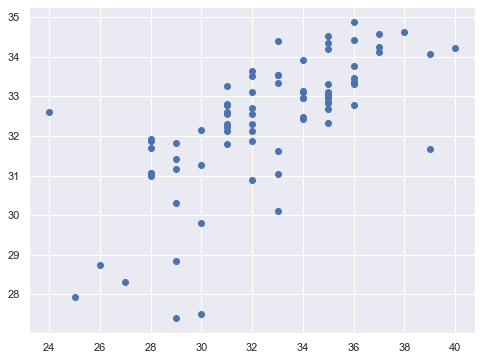

In [214]:
plt.scatter(y_test, las_pred)

In [215]:
# residuals
residuals = y_test - las_pred

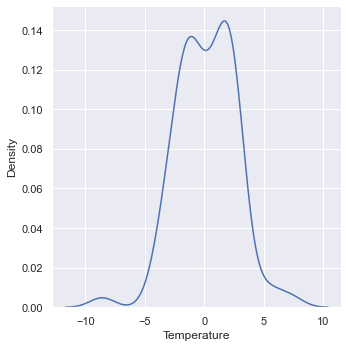

In [217]:
sns.displot(residuals, kind = 'kde')

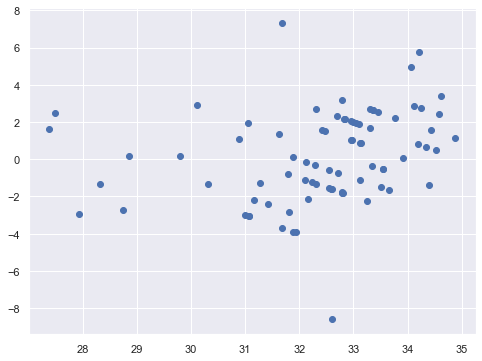

In [219]:
plt.scatter(las_pred,residuals)

In [220]:
# Performance Matrix 

In [225]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [226]:
mean_absolute_error(y_test, las_pred)

1.9978776414662665

In [227]:
mean_squared_error(y_test, las_pred)

6.085458745527471

In [228]:
np.sqrt(mean_squared_error(y_test, las_pred))

2.4668722596696147

In [229]:
#R2 
r2_score(y_test, las_pred)

0.4334228064508907

In [230]:
r3 = r2_score(y_test, las_pred)

In [235]:
r3

0.4334228064508907

In [231]:
N = len(y_test)

In [232]:
P = x_test.shape[1]

In [237]:
Adjusted_R2 = 1-(1-r3)*(N-1)/(N-P-1)

In [238]:
Adjusted_R2

0.35248320737244654

# ElasticNet Regression Model Prediction

In [241]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [242]:
elastic.fit(x_train, y_train)

ElasticNet()

In [243]:
elastic.coef_

array([-0.68808933, -0.10544712, -0.00834786,  0.85162206,  0.10376148,
        0.        ,  0.23158765,  0.02547021,  0.15362153,  0.07372069])

In [244]:
elastic.intercept_

31.98159509202454

In [245]:
# Prediction

In [246]:
elas_pred = elastic.predict(x_test)

In [247]:
elas_pred

array([32.70014869, 33.29910099, 33.41026626, 32.61092932, 34.7047485 ,
       31.58360838, 34.21527053, 29.02563256, 30.73347022, 30.11039166,
       30.41277398, 32.24275851, 32.49689882, 32.11572726, 33.82943086,
       32.26602144, 35.60101706, 27.89264401, 32.12951491, 32.95265792,
       31.02735367, 29.65251053, 33.71392821, 30.09882338, 35.36763797,
       28.87850096, 32.39310489, 32.86323328, 32.70140428, 34.17896096,
       33.34379291, 31.19918174, 32.72501691, 33.05000354, 32.11073799,
       32.39596102, 30.82655691, 33.29618332, 31.03905163, 27.97071052,
       32.81078878, 32.83085009, 32.18944481, 27.83881794, 34.71347157,
       32.40467835, 31.69547324, 30.73847724, 34.32027173, 33.61283179,
       35.5799204 , 31.38989764, 31.57088417, 33.58592157, 33.61999323,
       32.2560815 , 36.04767586, 32.00594323, 30.83622131, 34.89715148,
       33.0854042 , 30.78738109, 33.49083492, 31.9555529 , 31.71431021,
       27.98432489, 32.99835463, 31.35802614, 35.34742765, 34.14

In [248]:
# Assumptions

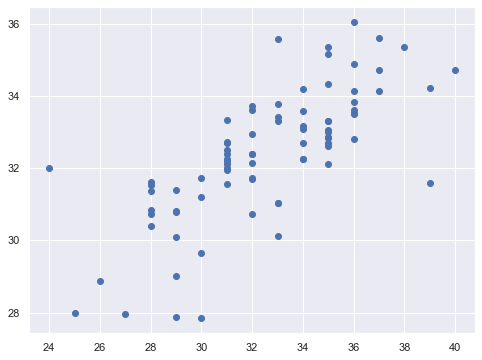

In [249]:
plt.scatter(y_test, elas_pred)

In [250]:
# residuals
residuals = y_test - elas_pred

In [251]:
residuals

24    -1.700149
6     -0.299101
153   -0.410266
211    2.389071
198    5.295251
         ...   
180    0.831457
5     -1.003679
56     1.867206
125   -1.721239
148    2.476763
Name: Temperature, Length: 81, dtype: float64

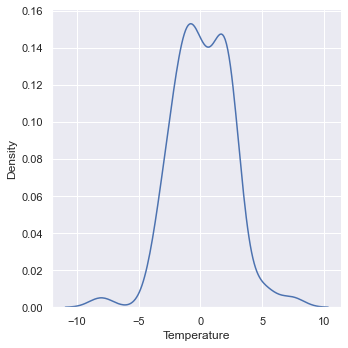

In [252]:
sns.displot(residuals, kind = 'kde')

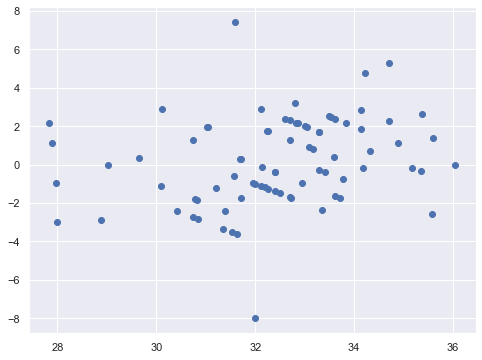

In [253]:
plt.scatter(elas_pred, residuals)

In [254]:
# performance Matrics

In [255]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [258]:
mean_absolute_error(y_test, elas_pred)


1.8476580620460623

In [260]:
mean_squared_error(y_test, elas_pred)


5.3906830397379695

In [262]:
np.sqrt(mean_squared_error(y_test, elas_pred))

2.3217844516100046

In [263]:
r4 = r2_score(y_test, elas_pred)

In [271]:
r4

0.49810882043818905

In [264]:
N = len(y_test)

In [265]:
P = x_test.shape[1]

In [268]:
#adjusted R2
adjusted_R2 = 1- (1-r4)*(N-1)/(N-P-1)

In [270]:
adjusted_R2

0.42641008050078755

# Thankyou